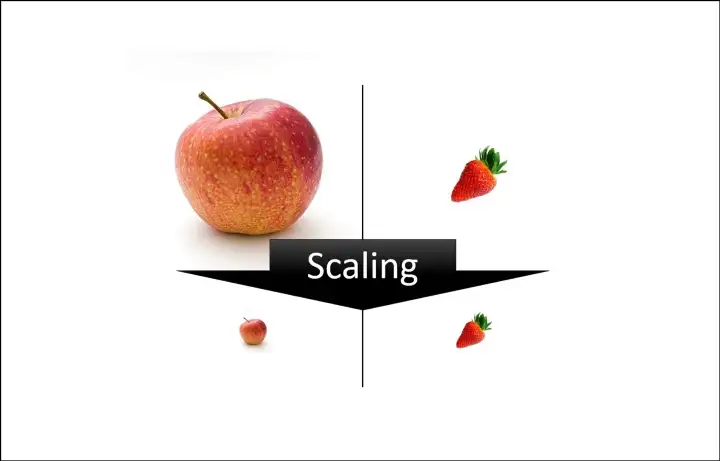

Machine learning is like making a mixed fruit juice. If we want to get the best-mixed juice, we need to mix all fruit not by their size but based on their right proportion. We just need to remember apple and strawberry are not the same unless we make them similar in some context to compare their attribute. Similarly, in many machine learning algorithms, to bring all features in the same standing, we need to do scaling so that one significant number doesn’t impact the model just because of their large magnitude.

Feature scaling in machine learning is one of the most critical steps during the pre-processing of data before creating a machine learning model. Scaling can make a difference between a weak machine learning model and a better one.

The most common techniques of feature scaling are Normalization and Standardization.

## Normalization is used when we want to bound our values between two numbers, typically, between [0,1] or [-1,1]. 

## Standardization transforms the data to have zero mean and a variance of 1, they make our data unitless. 

Refer to the below diagram, which shows how data looks after scaling in the X-Y plane.**

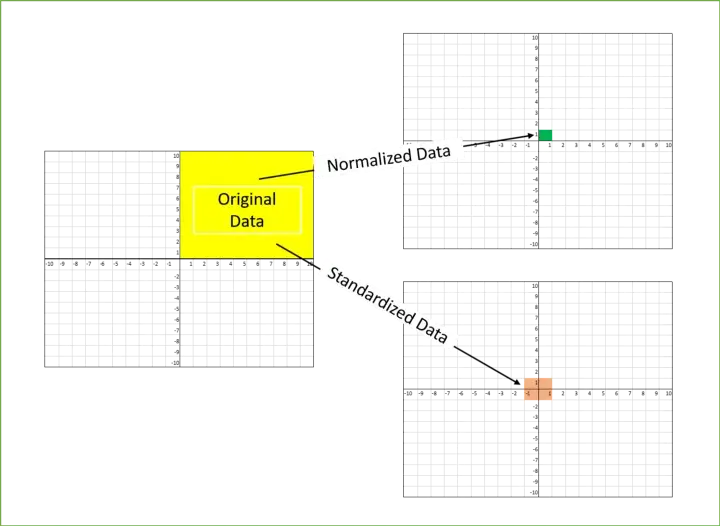

## Why do we need scaling?

Machine learning algorithm just sees number — if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training the model.

The machine learning algorithm works on numbers and does not know what that number represents. A weight of 10 grams and a price of 10 dollars represents completely two different things — which is a no brainer for humans, but for a model as a feature, it treats both as same.

Suppose we have two features of weight and price, as in the below table. The “Weight” cannot have a meaningful comparison with the “Price.” So the assumption algorithm makes that since “Weight” > “Price,” thus “Weight,” is more important than “Price.”

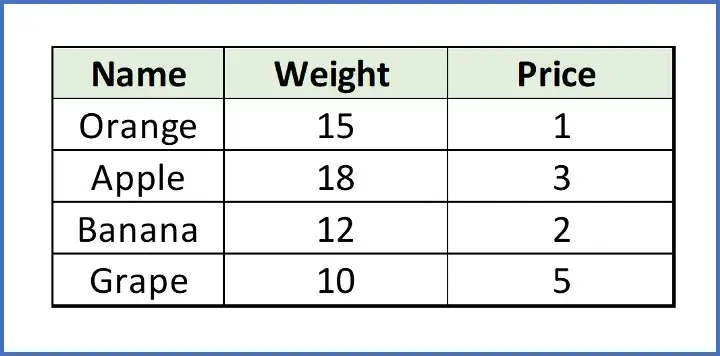

So these more significant number starts playing a more decisive role while training the model. Thus feature scaling is needed to bring every feature in the same footing without any upfront importance. Interestingly, if we convert the weight to “Kg,” then “Price” becomes dominant.

Another reason why feature scaling is applied is that few algorithms like Neural network gradient descent converge much faster with feature scaling than without it.

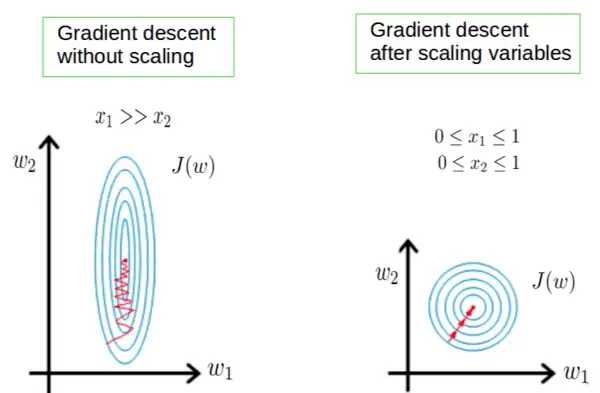

One more reason is saturation, like in the case of sigmoid activation in Neural Network, scaling would help not to saturate too fast.

## When to do scaling?

Feature scaling is essential for machine learning algorithms that calculate distances between data. If not scale, the feature with a higher value range starts dominating when calculating distances, as explained intuitively in the “why?” section.

The ML algorithm is sensitive to the “relative scales of features,” which usually happens when it uses the numeric values of the features rather than say their rank.

In many algorithms, when we desire faster convergence, scaling is a MUST like in Neural Network.

Rule of thumb we may follow here is an algorithm that computes distance or assumes normality, scales your features.

**Some examples of algorithms where feature scaling matters are:**

- K-nearest neighbors (KNN) with a Euclidean distance measure is sensitive to magnitudes and hence should be scaled for all features to weigh in equally.

- K-Means uses the Euclidean distance measure here feature scaling matters.

- Scaling is critical while performing Principal Component Analysis(PCA). PCA tries to get the features with maximum variance, and the variance is high for high magnitude features and skews the PCA towards high magnitude features.

- We can speed up gradient descent by scaling because θ descends quickly on small ranges and slowly on large ranges, and oscillates inefficiently down to the optimum when the variables are very uneven.

Algorithms that do not require normalization/scaling are the ones that rely on rules. They would not be affected by any monotonic transformations of the variables. Scaling is a monotonic transformation. Examples of algorithms in this category are all the tree-based algorithms — CART, Random Forests, Gradient Boosted Decision Trees. These algorithms utilize rules (series of inequalities) and do not require normalization.

Algorithms like Linear Discriminant Analysis(LDA), Naive Bayes is by design equipped to handle this and give weights to the features accordingly. Performing features scaling in these algorithms may not have much effect.

## How to perform feature scaling?

Below are the few ways we can do feature scaling.

**1) Standard Scaler**
**2) Min Max Scaler**

## 1. Standardization using StandardScaler

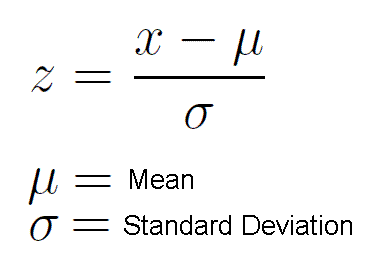

The Standard Scaler assumes data is normally distributed within each feature and scales them such that the distribution centered around 0, with a standard deviation of 1.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. If data is not normally distributed, this is not the best Scaler to use.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tips_data = sns.load_dataset("tips")
tips_data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [18]:
tips_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


Data scaling is applied to numeric columns. In our “tips” dataset we have three numeric columns: total_bill, tip, size. The script below filters these three columns and removes the remaining columns.

In [19]:
tips_data_num = tips_data.select_dtypes(exclude="category")
tips_data_num

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


Let’s plot some statistical values for the columns in our dataset using the describe() method.

In [21]:
tips_data_num.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


The above output confirms our three columns are not scaled. The mean, minimum and maximum values, and even the standard deviation values for all three columns are very different.

This unscaled dataset is not suitable for processing by some statistical algorithms. We need to scale this data so that’s exactly what we’ll do in the upcoming sections where we’ll show you different types of data scaling techniques in action.

In [22]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

tips_data_scaled = ss.fit_transform(tips_data_num)
tips_data_scaled

array([[-3.14711305e-01, -1.43994695e+00, -6.00192629e-01],
       [-1.06323531e+00, -9.69205340e-01,  4.53382921e-01],
       [ 1.37779900e-01,  3.63355539e-01,  4.53382921e-01],
       [ 4.38315103e-01,  2.25754144e-01, -6.00192629e-01],
       [ 5.40744704e-01,  4.43019505e-01,  1.50695847e+00],
       [ 6.19536705e-01,  1.23965916e+00,  1.50695847e+00],
       [-1.23995452e+00, -7.22971264e-01, -6.00192629e-01],
       [ 7.98507107e-01,  8.81527488e-02,  1.50695847e+00],
       [-5.34203307e-01, -7.51939979e-01, -6.00192629e-01],
       [-5.63468908e-01,  1.67816714e-01, -6.00192629e-01],
       [-1.07111451e+00, -9.32994446e-01, -6.00192629e-01],
       [ 1.74175992e+00,  1.44968234e+00,  1.50695847e+00],
       [-4.91430507e-01, -1.03438495e+00, -6.00192629e-01],
       [-1.52624903e-01,  1.24660453e-03,  1.50695847e+00],
       [-5.57840908e-01,  1.57309619e-02, -6.00192629e-01],
       [ 2.01939101e-01,  6.67527044e-01, -6.00192629e-01],
       [-1.06436091e+00, -9.61963161e-01

In [23]:
cols = tips_data_num.columns
cols

Index(['total_bill', 'tip', 'size'], dtype='object')

In [24]:
tips_data_scaled_df = pd.DataFrame(tips_data_scaled, columns = cols)
tips_data_scaled_df[:5]

,total_bill,tip,size
0,-0.314711,-1.439947,-0.600193
1,-1.063235,-0.969205,0.453383
2,0.137780,0.363356,0.453383
3,0.438315,0.225754,-0.600193
4,0.540745,0.443020,1.506958


If you call the describe() function again, you’ll see that your data columns are now uniformly scaled and will have a mean centered around 0.

In [26]:
tips_data_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,-6.597637e-17,1.002056,-1.881547,-0.724711,-0.224101,0.488686,3.492068
tip,244.0,2.846297e-16,1.002056,-1.447189,-0.722971,-0.071175,0.408619,5.070772
size,244.0,-1.410529e-16,1.002056,-1.653768,-0.600193,-0.600193,0.453383,3.614110


## 2. Min-Max scaler

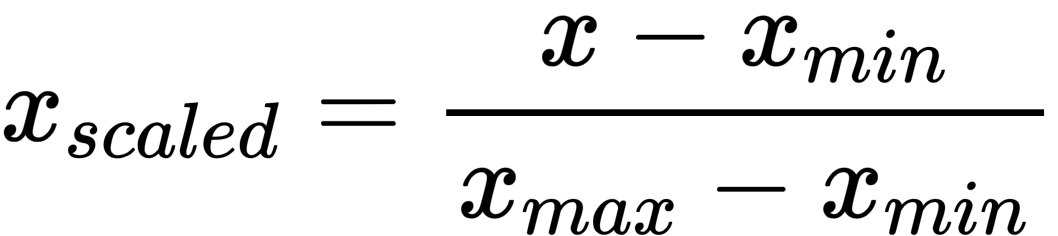

Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g., between zero and one. This Scaler shrinks the data within the range of -1 to 1 if there are negative values. We can set the range like [0,1] or [0,5] or [-1,1].

This Scaler responds well if the standard deviation is small and when a distribution is not Gaussian. This Scaler is sensitive to outliers.

In [30]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
tips_data_scaled1 = mms.fit_transform(tips_data_num)
tips_data_scaled1

array([[0.29157939, 0.00111111, 0.2       ],
       [0.1522832 , 0.07333333, 0.4       ],
       [0.3757855 , 0.27777778, 0.4       ],
       [0.43171345, 0.25666667, 0.2       ],
       [0.45077503, 0.29      , 0.6       ],
       [0.46543779, 0.41222222, 0.6       ],
       [0.11939673, 0.11111111, 0.2       ],
       [0.49874319, 0.23555556, 0.6       ],
       [0.25073314, 0.10666667, 0.2       ],
       [0.24528697, 0.24777778, 0.2       ],
       [0.15081693, 0.07888889, 0.2       ],
       [0.67427734, 0.44444444, 0.6       ],
       [0.25869292, 0.06333333, 0.2       ],
       [0.32174277, 0.22222222, 0.6       ],
       [0.24633431, 0.22444444, 0.2       ],
       [0.38772518, 0.32444444, 0.2       ],
       [0.15207373, 0.07444444, 0.4       ],
       [0.27691663, 0.30111111, 0.4       ],
       [0.29116045, 0.27777778, 0.4       ],
       [0.36824466, 0.26111111, 0.4       ],
       [0.31105991, 0.34222222, 0.2       ],
       [0.36070381, 0.19444444, 0.2       ],
       [0.

In [29]:
tips_data_scaled_df1 = pd.DataFrame(tips_data_scaled1, columns = cols)
tips_data_scaled_df1.head()

,total_bill,tip,size
0,0.291579,0.001111,0.2
1,0.152283,0.073333,0.4
2,0.375786,0.277778,0.4
3,0.431713,0.256667,0.2
4,0.450775,0.290000,0.6


In [32]:
tips_data_scaled_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,0.350145,0.186477,0.0,0.215281,0.308442,0.441087,1.0
tip,244.0,0.222031,0.153738,0.0,0.111111,0.211111,0.284722,1.0
size,244.0,0.313934,0.190220,0.0,0.200000,0.200000,0.400000,1.0
